In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def model(r, t, alpha, beta, ie, gamma, slope):
	v, w = r
	vdot = vNL(v, alpha, beta, ie) - w 
	wdot = gamma*(wNL(v, slope) -  w)
	return vdot, wdot

def vNL(v, alpha, beta, ie):
	return v * (alpha - v) * (v - beta) + ie

def wNL(v, slope):
    return slope*v

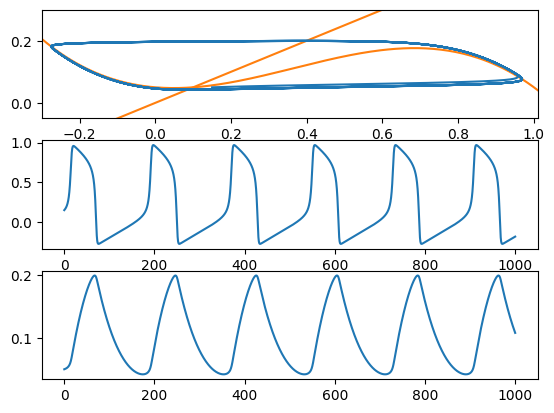

In [13]:
alpha = 0.1
beta = 1
ie = 0.05
slope = 0.5
gamma = .01

plt.subplot(311)
v = np.linspace(-0.3, 1.01, 200)
plt.plot(v,vNL(v, alpha, beta, ie), color="C1")
plt.plot(v,wNL(v, slope), color="C1")
plt.axis([-0.3, 1.01, -.05, .3])

r0 = [0.15, 0.05]
t = np.linspace(0, 1000, 100000)
r = odeint(model, r0, t, args=(alpha, beta, ie, gamma, slope))
plt.plot(r[:,0], r[:,1])

plt.subplot(312)
plt.plot(t, r[:,0])

plt.subplot(313)
plt.plot(t, r[:,1])
